In [624]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the trained model
model = load_model('D:\\anangsha\\Sync Intern\\sign_language_model.h5')


In [625]:
train_data = pd.read_csv("E:\sign_mnist_train.csv")
print(train_data.shape)
train_data.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [626]:
test_data = pd.read_csv("E:\sign_mnist_test.csv")
print(test_data.shape)
test_data.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [627]:
y_train=train_data["label"]
y_test=test_data["label"]
train_x=train_data.drop(labels=["label"],axis=1)
test_x=test_data.drop(labels=["label"],axis=1)

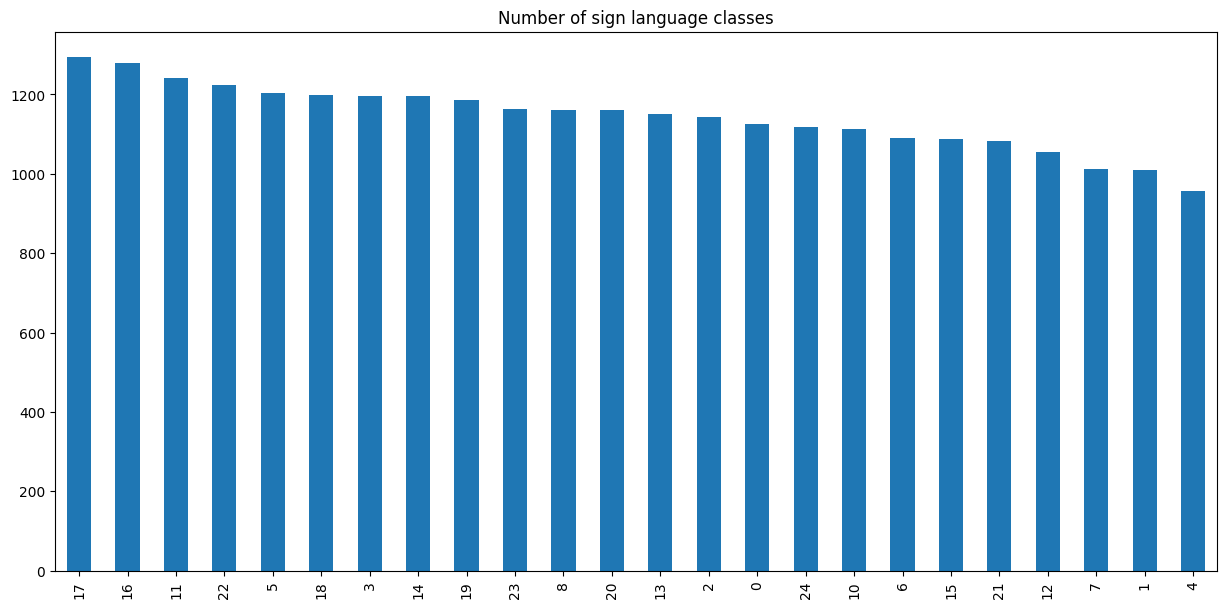

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [628]:
# visiual number of Sign Language classes
plt.figure(figsize=(15,7))

y_train.value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title("Number of sign language classes")
plt.show()

y_train.value_counts().sort_values(ascending=False)

In [629]:
def show_images(images, labels):
    # Convert DataFrame to NumPy array and squeeze singleton dimension
    images = np.squeeze(images.values)

    # Reshape the images to 28x28
    images = images.reshape(-1, 28, 28)

    # Get unique labels
    unique_labels = np.unique(labels)

    # Create a figure with subplots
    fig, ax = plt.subplots(2, 4, figsize=(10, 5))

    # Initialize index for traversing images
    k = 0

    # Loop through subplots
    for i in range(2):
        for j in range(4):
            ax[i, j].imshow(images[k], cmap='gray')
            ax[i, j].set_title(str(unique_labels[np.argmax(labels[k])]))
            k = k + 1

    plt.show()


In [630]:
print(train_x.shape)


(27455, 784)


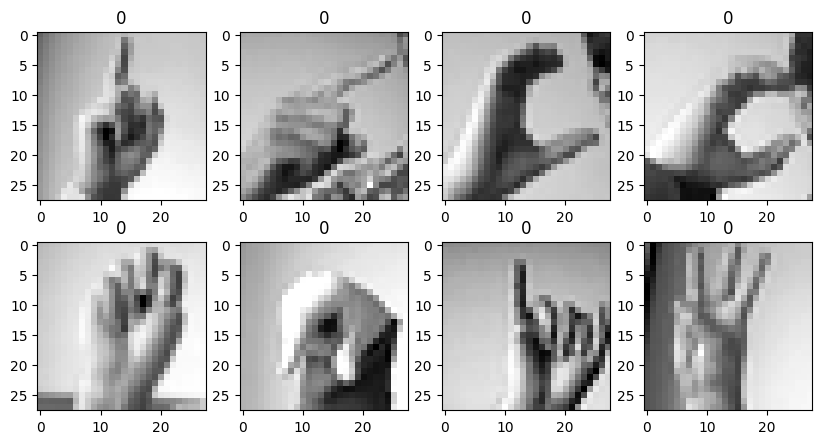

In [631]:
show_images(train_x,y_train)

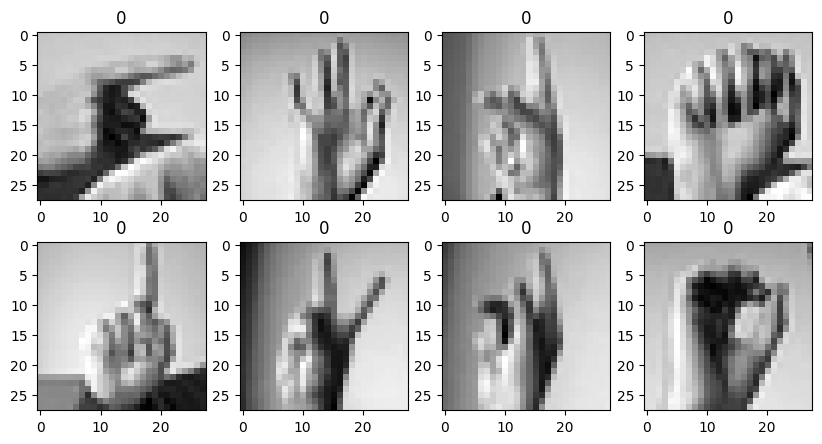

In [632]:
show_images(test_x,y_test)

# DATA AUGMENTATION

In [633]:
from keras.preprocessing.image import ImageDataGenerator

In [634]:
print("train shape: ",train_x.shape)
print("test shape: ",test_x.shape)

train shape:  (27455, 784)
test shape:  (7172, 784)


In [635]:
train_x=train_x.values.reshape(-1,28,28,1)
test_x=test_x.values.reshape(-1,28,28,1)

print("x_train shape: ",train_x.shape)
print("test shape: ",test_x.shape)

x_train shape:  (27455, 28, 28, 1)
test shape:  (7172, 28, 28, 1)


In [636]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
y_train = label_binrizer.fit_transform(y_train)

In [637]:
# Train Test Split

from sklearn.model_selection import train_test_split
train_x,val_x, y_train, y_val = train_test_split(train_x, y_train, test_size=0.15, random_state=42)

print("x_train shape",train_x.shape)
print("x_test shape",val_x.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (23336, 28, 28, 1)
x_test shape (4119, 28, 28, 1)
y_train shape (23336, 24)
y_test shape (4119, 24)


In [638]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [639]:
model=Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding="Same",
                activation="relu", input_shape=(28,28,1))) # # We have 8 filters. (5x5)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="Same",
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="Same",
                activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connetcted
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(24,activation="softmax"))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 14, 14, 16)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_55 (Dropout)        (None, 7, 7, 32)        

In [640]:
# Define the optimier
optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# beta 1 and beta2 parameters are the parameters that affect the change of the learning rate.

c:\Users\anuha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [641]:
# Compile Model:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [642]:
epochs=25 # for better result increase the epochs
batch_size=200

In [643]:
datagen=ImageDataGenerator(rotation_range=40, # Random rotation angle of images.
                          width_shift_range=0.2, # Horizontal and vertical scroll ratio of images
                          height_shift_range=0.2, 
                          shear_range=0.2, # Sprain process
                          zoom_range=0.2, # rapprochement process
                          horizontal_flip=True, #  Rotate image vertically.
                          fill_mode='nearest') # scroll, rotate, etc. determines how to fill in the excess image points that appear after the process.

datagen.fit(train_x)

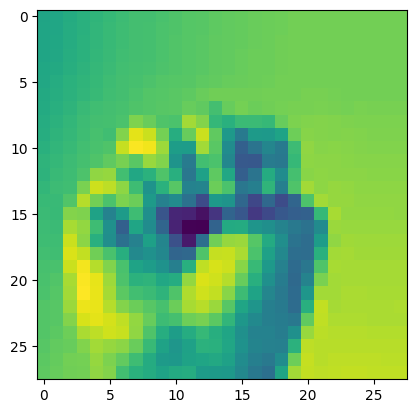

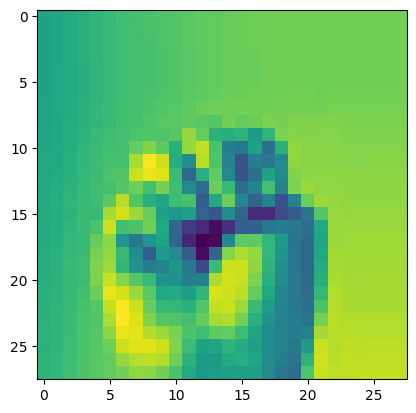

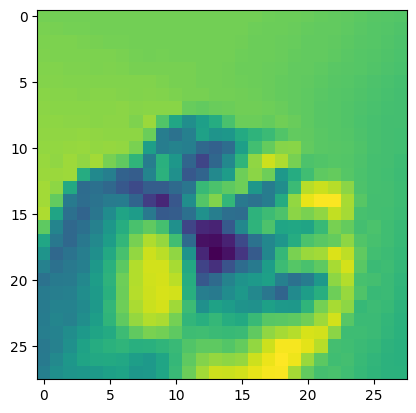

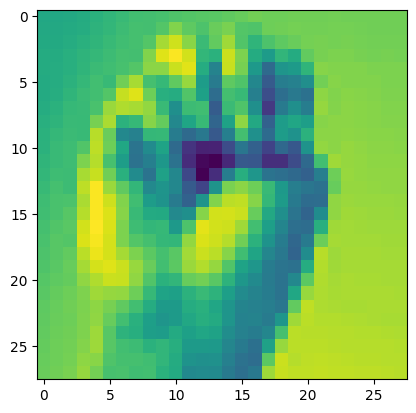

In [644]:
## Diversified Image
import keras.utils as image

a=train_x[0]
a=a.reshape((1,)+ a.shape)

i=0
for batch in datagen.flow(a,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()
    

# Model Evaluation

In [659]:
history=model.fit_generator(datagen.flow(train_x,y_train, batch_size=batch_size), epochs=epochs,
                           validation_data=(val_x,y_val), steps_per_epoch=train_x.shape[0] // batch_size)

Epoch 1/25


C:\Users\anuha\AppData\Local\Temp\ipykernel_8124\2050425551.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(datagen.flow(train_x,y_train, batch_size=batch_size), epochs=epochs,


116/116 [==============================] - 6s 51ms/step - loss: 0.5531 - accuracy: 0.8149 - val_loss: 0.0792 - val_accuracy: 0.9828
Epoch 2/25
116/116 [==============================] - 5s 44ms/step - loss: 0.5422 - accuracy: 0.8170 - val_loss: 0.0964 - val_accuracy: 0.9760
Epoch 3/25
116/116 [==============================] - 5s 47ms/step - loss: 0.5506 - accuracy: 0.8124 - val_loss: 0.0973 - val_accuracy: 0.9706
Epoch 4/25
116/116 [==============================] - 5s 46ms/step - loss: 0.5364 - accuracy: 0.8169 - val_loss: 0.1055 - val_accuracy: 0.9631
Epoch 5/25
116/116 [==============================] - 5s 46ms/step - loss: 0.5259 - accuracy: 0.8231 - val_loss: 0.0683 - val_accuracy: 0.9791
Epoch 6/25
116/116 [==============================] - 6s 47ms/step - loss: 0.5315 - accuracy: 0.8219 - val_loss: 0.0896 - val_accuracy: 0.9762
Epoch 7/25
116/116 [==============================] - 6s 49ms/step - loss: 0.5409 - accuracy: 0.8164 - val_loss: 0.0722 - val_accuracy: 0.9820
Epoch 8/25

In [660]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

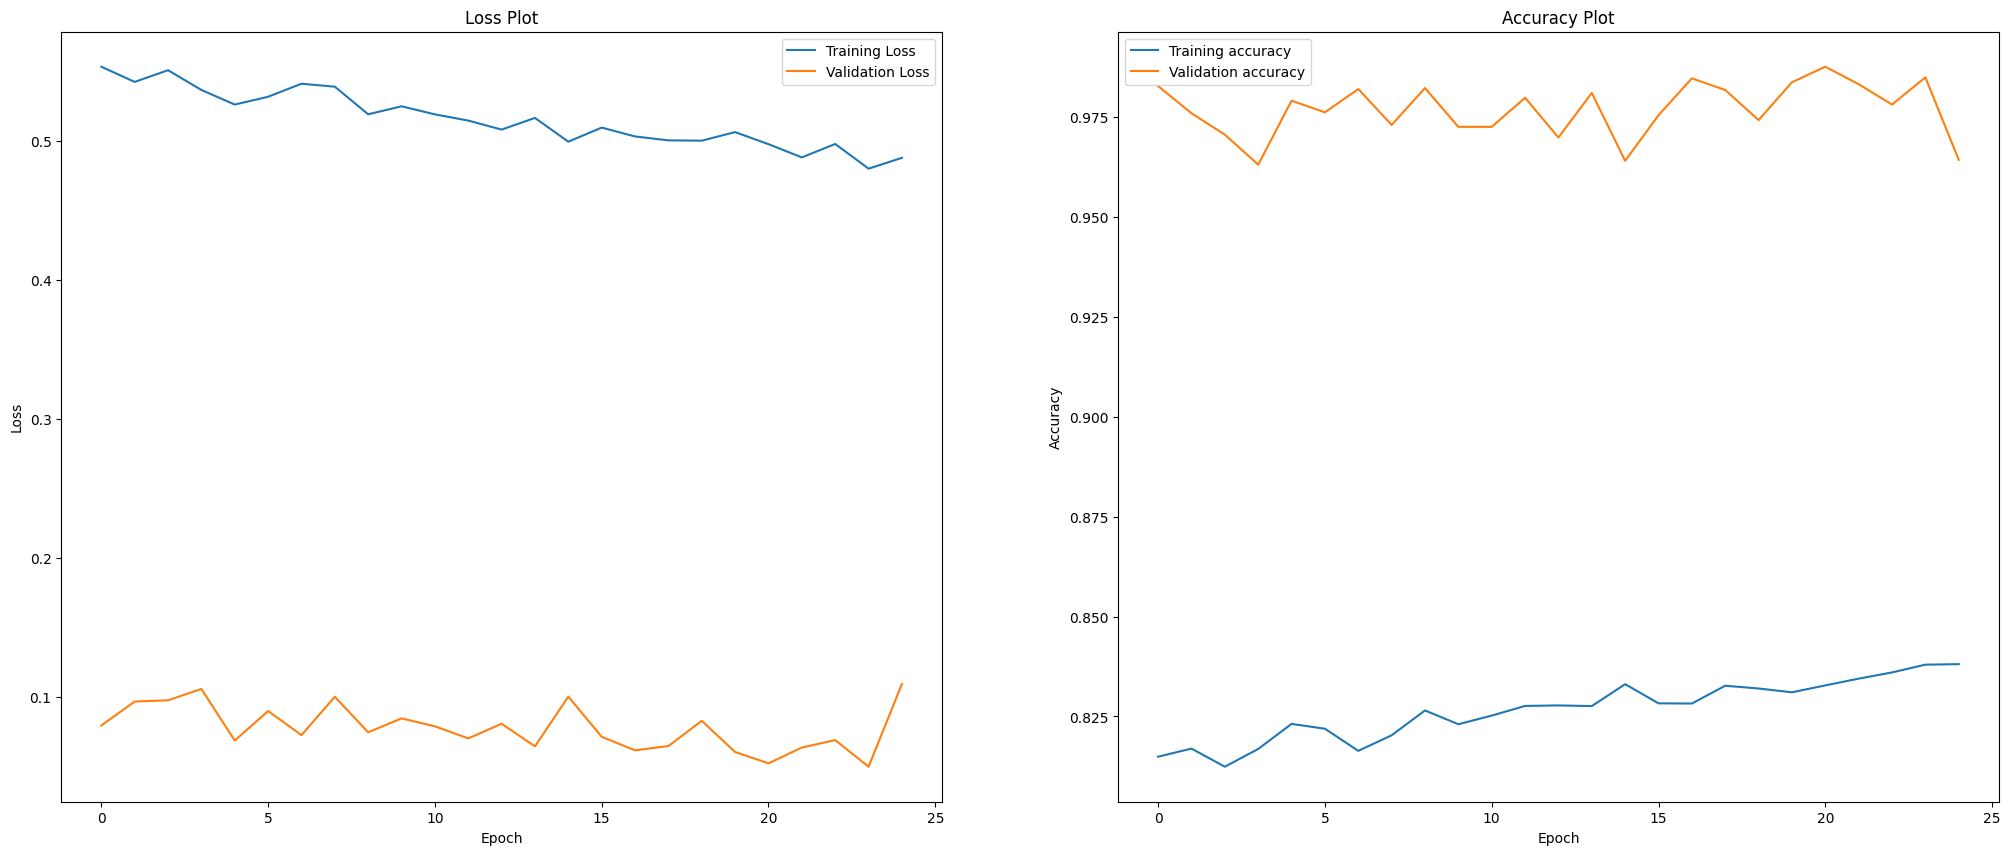

In [661]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(history.history["loss"],label="Training Loss")
ax[0].plot(history.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Plot")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].legend()

ax[1].plot(history.history["accuracy"],label="Training accuracy")
ax[1].plot(history.history["val_accuracy"],label="Validation accuracy")
ax[1].set_title("Accuracy Plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()

plt.show()


In [662]:
predictions = model.predict(test_x)

225/225 [==============================] - 1s 5ms/step


In [663]:
def predictions_to_labels(pred):
    labels =[]
    for p in pred:
        labels.append(str(unique_labels[np.argmax(p)]))
    return labels

In [664]:
y_pred_labels = predictions_to_labels(predictions)
y_test_labels = predictions_to_labels(y_test)

In [665]:
import seaborn as sns

129/129 [==============================] - 1s 5ms/step


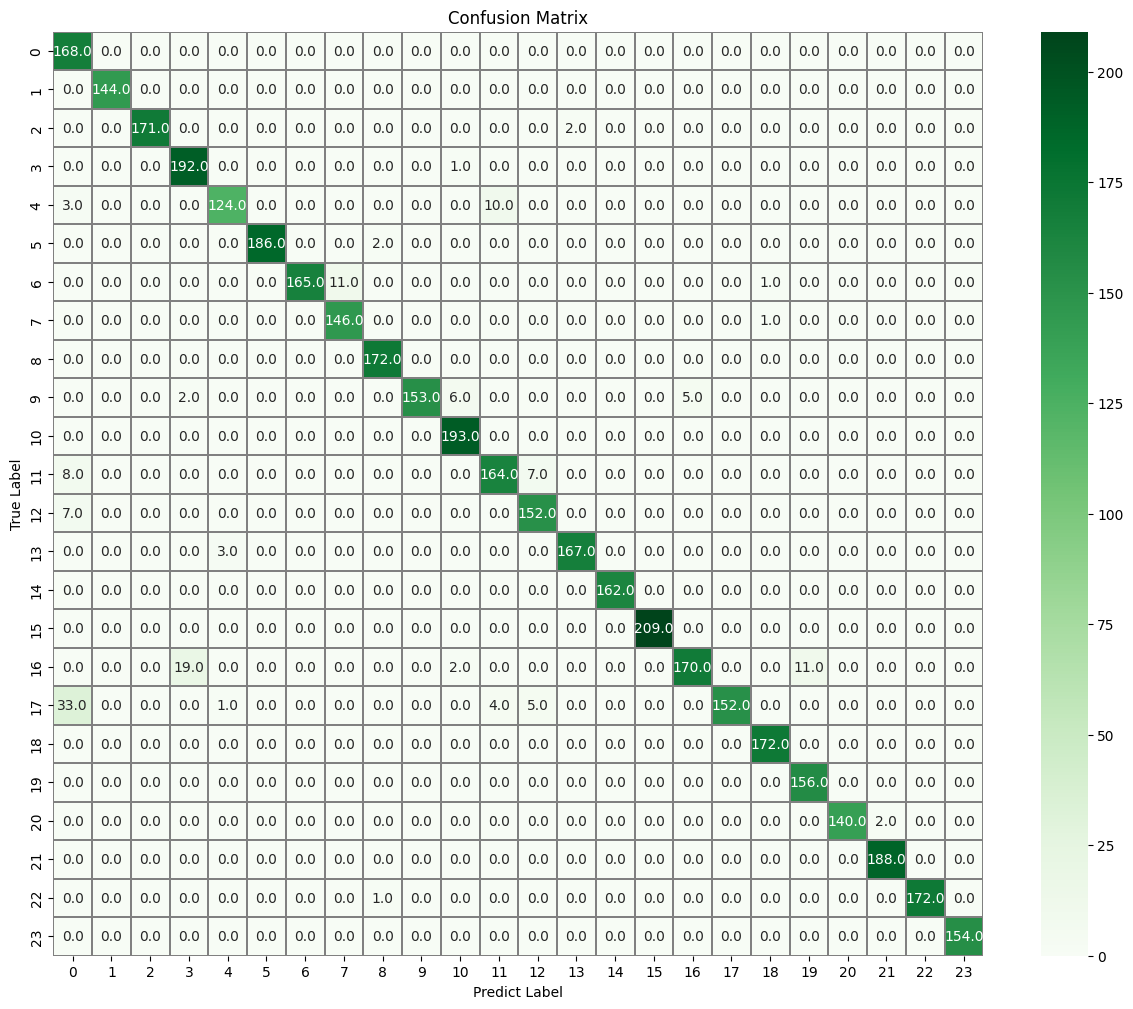

In [666]:
# confusion matrix
# Predict the values from validation dataset
Y_pred=model.predict(val_x)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(y_val, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(15,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

225/225 [==============================] - 1s 5ms/step


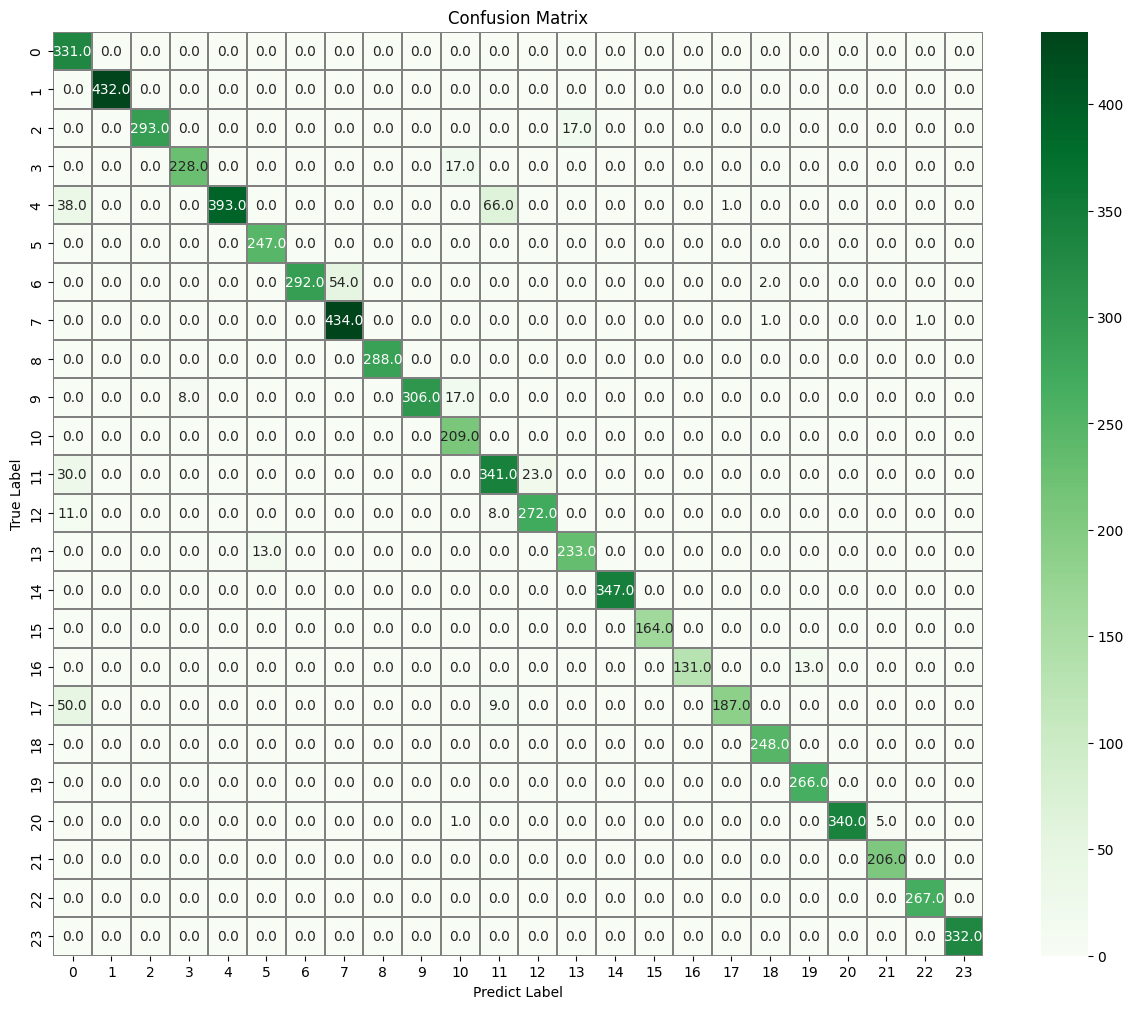

In [667]:
# For test data set:
Y_test = label_binrizer.fit_transform(y_test)

Y_pred=model.predict(test_x)
# Convert predictions classes to one hot vectors
Y_pred_classes=np.argmax(Y_pred, axis=1)
# Convert validation observation to one hot vectors
Y_true=np.argmax(Y_test, axis=1)
# Compute the confusion matrix
confusion_mtx=confusion_matrix(Y_true,Y_pred_classes)
# plot confusion matrix
f,ax=plt.subplots(figsize=(15,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt=".1f", ax=ax)
plt.xlabel("Predict Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

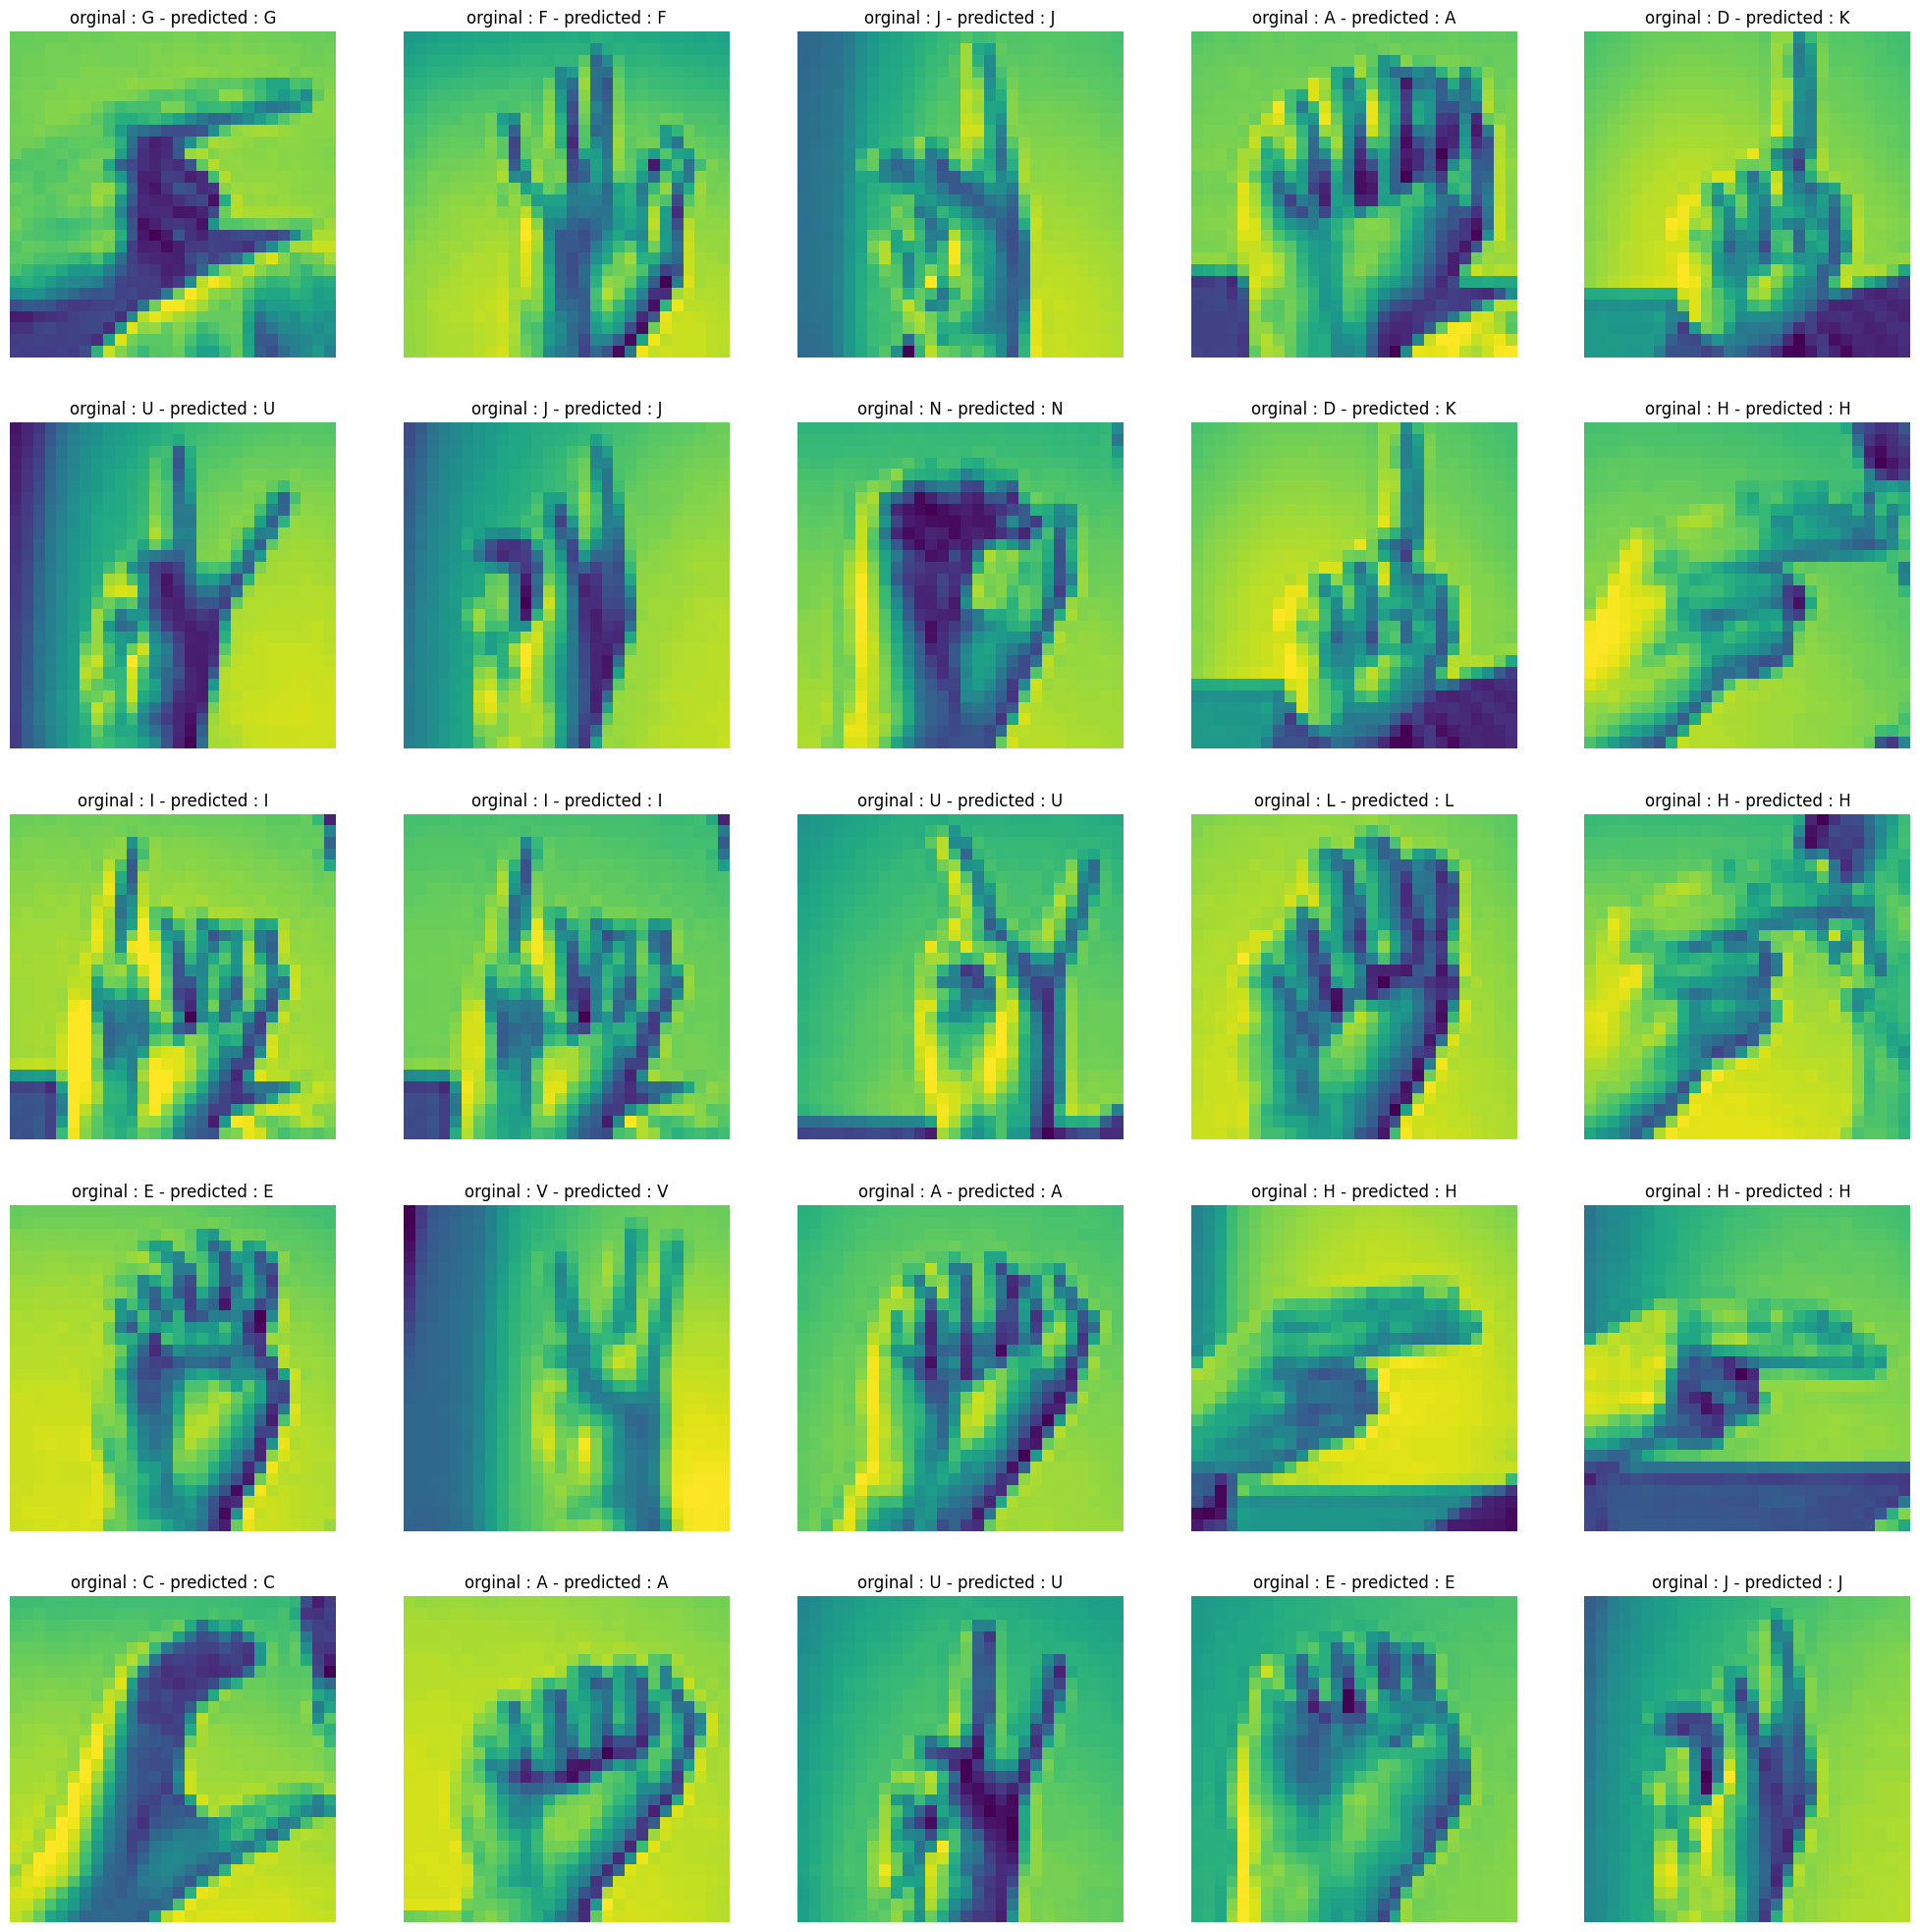

In [668]:
plt.figure(figsize=(25,25))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_x[i])
    plt.title("orginal : {} - predicted : {}".format(chr(Y_true[i]+65), chr(Y_pred_classes[i]+65)))
    plt.axis("off")